# Часть 1. Исследовательский анализ данных в Python  и проверка гипотез. Знакомство с данными

## Знакомство с данными

- Автор:Ким олег
- Дата: 19.06

## Цели и задачи проекта




Цель проекта - проанализировать показатели яндекс афиши

1) Провести исследовательский анализ данных

2) Проанализировать активность пользователей и популярные события  

3) Проверить гипотезы относительно активности пользователей мобильных и стационарных устройств


## Описание данных


Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов,
* order_id — уникальный идентификатор заказа.
* user_id — уникальный идентификатор пользователя.
* created_dt_msk — дата создания заказа (московское время).
* created_ts_msk — дата и время создания заказа (московское время).
* event_id — идентификатор мероприятия из таблицы events.
* cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
* age_limit — возрастное ограничение мероприятия.
* currency_code — валюта оплаты, например rub для российских рублей.
* device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
* revenue — выручка от заказа.
* service_name — название билетного оператора.
* tickets_count — количество купленных билетов.
* total — общая сумма заказа.
* days_since_prev - уол-во дней с предыдущего заказа

Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия

* event_id — уникальный идентификатор мероприятия.
* event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
* event_type_description — описание типа мероприятия.
* event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
* organizers — организаторы мероприятия.
* region_name — название региона.
* city_name — название города.
* venue_id — уникальный идентификатор площадки.
* venue_name — название площадки.
* venue_address — адрес площадки.

## Содержимое проекта

1. загрузка данных Яндекс афиши и знакомство с ними 
2. исследовательский анализ данных
3. Статистический анализ данных
4. Итоговый вывод

## 1. Загрузка данных и знакомство с ними

In [10]:
import pandas as pd # импорт бибилотеки pandas

Для начала выгрузим данные и познакомимся с ними

In [12]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv') # импорт данных

### Предобработка данных и подготовка их к исследованию

In [14]:
display(orders.info())
events.info() # вывод информации по датафреймам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [15]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


В обоих датасетах отсутсвую пропуски, за исключением days_since_prev, пропуски в которм не критичны и могут быть проигнорированы. В датасете с заказами 290849 сток и 14 столбцов, в датасете с событиями 11 столбцов и 22427 строк. Все строки за исключением created_dt_msk и created_ts_msk имеют корректный тип данных

In [76]:
orders['created_ts_msk'] = orders['created_ts_msk'].astype('datetime64[ns]')
orders['created_dt_msk']  = orders['created_dt_msk'].astype('datetime64[ns]')

Теперь все данные имеют корректный тип, проверим на дубли

In [78]:
display(events.duplicated().sum())
display(orders.duplicated().sum())
display(events['event_id'].duplicated().sum())
display(orders['order_id'].duplicated().sum()) # сумма дублей 

0

0

0

0

получаем что явных дубликатов нет, проверим на неявные

In [81]:
orders_subset = ['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 
                 'cinema_circuit', 'age_limit', 'currency_code','device_type_canonical', 
                 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev']
events_subset = ['event_name','event_type_description', 'event_type_main', 'organizers',
                'region_name', 'city_name', 'city_id','venue_id','venue_name',  'venue_address'] # создаем 2 списка с необходимыми столбцами
display(orders.duplicated(subset = orders_subset ).sum())
events.duplicated(subset = events_subset ).sum() # высчитываем дубли по необходимым колонкам

30

871

Получаем что у нас 30 неявных дублей в табилце orders, что является примерно 0,01% от всех зхначений, поэтому избавимся от них, что касается дублей в датасете events, можем их оставить так как они не будут влиять на последующие расчеты

In [84]:
orders = orders.drop_duplicates(subset = orders_subset ) # удаляем найденные дубли

осталось проверить данные на выборсы, а именно проверим кол-во купленных билетов и выручку. Так как выручка у нас представлена в 2 валютах, поделим датафрейм на 2 с рублями и тенге

In [87]:
ord_kzt = orders[orders['currency_code'] == 'kzt']
ord_rub = orders[orders['currency_code'] == 'rub']# создаем 2 датафрейма с разной валютой

In [89]:
import matplotlib.pyplot as plt # импортируем бибилотеку

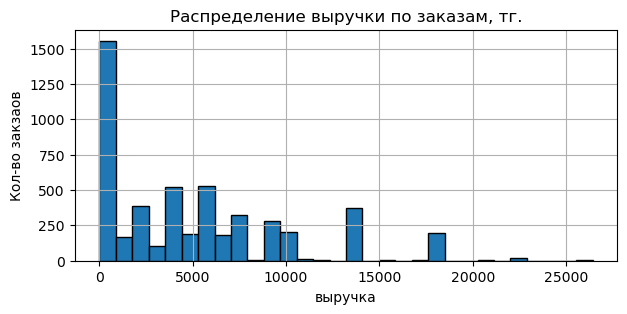

In [90]:
plt.figure(figsize=(7, 3))

ord_kzt['revenue'].plot(
                kind='hist', # тип гистограмма
                bins=30, # 30 ячеек
                edgecolor='black', # черная обводка
)

plt.title('Распределение выручки по заказам, тг.')
plt.xlabel('выручка')
plt.ylabel('Кол-во закзаов')

plt.grid() # Сетка

plt.show() # вывод гистограммы

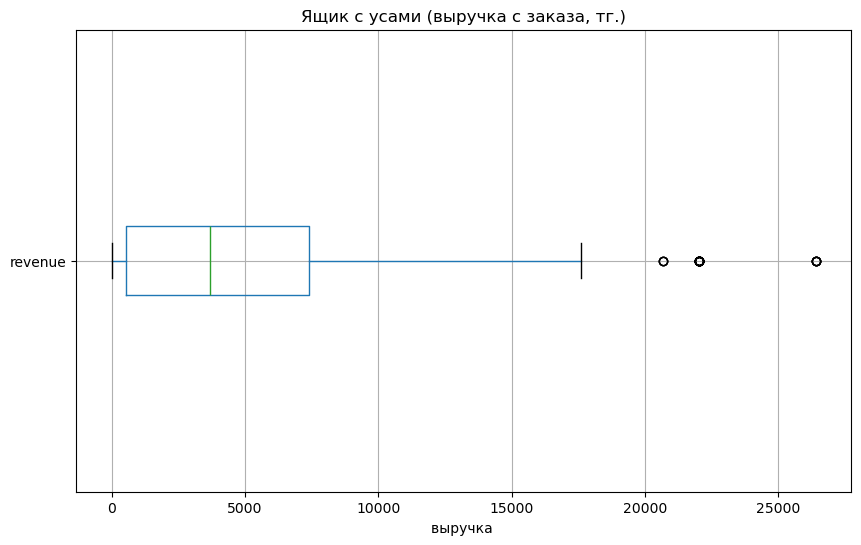

In [92]:
plt.figure(figsize = [10,6])

ord_kzt.boxplot(column = 'revenue', # столбец расчета
                       showfliers = True, # показывать выбросы
                       vert = False) # направление графика
plt.title('Ящик с усами (выручка с заказа, тг.)')
plt.xlabel('выручка ')
plt.show()

видим, что по закзаам с валютой Тенге, у нас есть несколько выбросов, проверим рубли и избавимся от всех выбросов

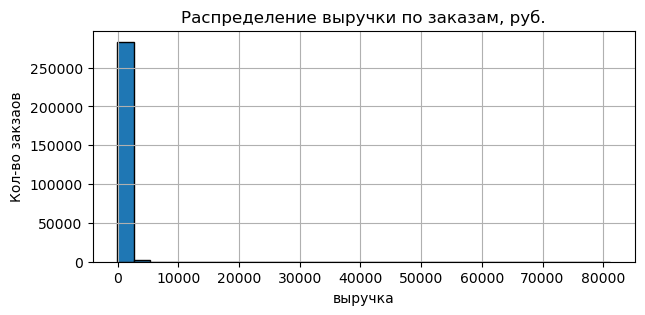

In [96]:
plt.figure(figsize=(7, 3))

ord_rub['revenue'].plot(
                kind='hist', 
                bins=30,
                edgecolor='black'
)

plt.title('Распределение выручки по заказам, руб.')
plt.xlabel('выручка')
plt.ylabel('Кол-во закзаов')

plt.grid()

plt.show() 

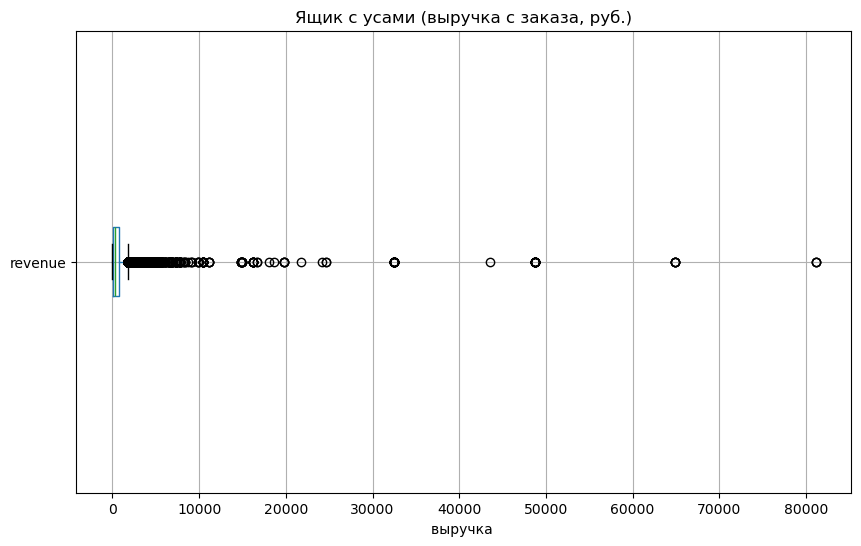

In [98]:
plt.figure(figsize = [10,6])

ord_rub.boxplot(column = 'revenue',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (выручка с заказа, руб.)')
plt.xlabel('выручка ')
plt.show()

на графике распределния хоть и не видно, но ящик с усами четко показывает, что выбросы у нас присутсвуют и из достаточно много

In [100]:
clean_ord_rub= ord_rub.drop(ord_rub[ord_rub['revenue']>= ord_rub['revenue'].quantile(0.95)].index)
clean_ord_kzt= ord_kzt.drop(ord_kzt[ord_kzt['revenue']>= ord_kzt['revenue'].quantile(0.95)].index) # удаление выюросов по перцентилю

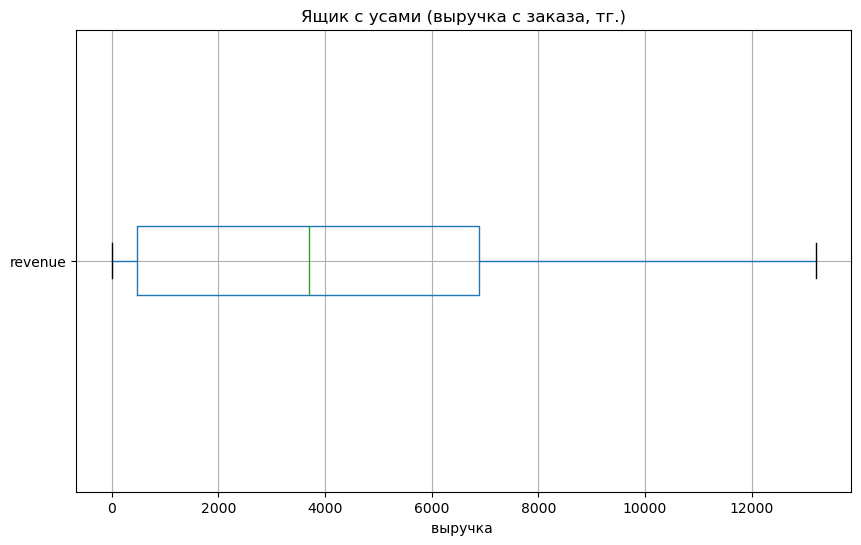

In [101]:
plt.figure(figsize = [10,6])

clean_ord_kzt.boxplot(column = 'revenue',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (выручка с заказа, тг.)')
plt.xlabel('выручка ')
plt.show()

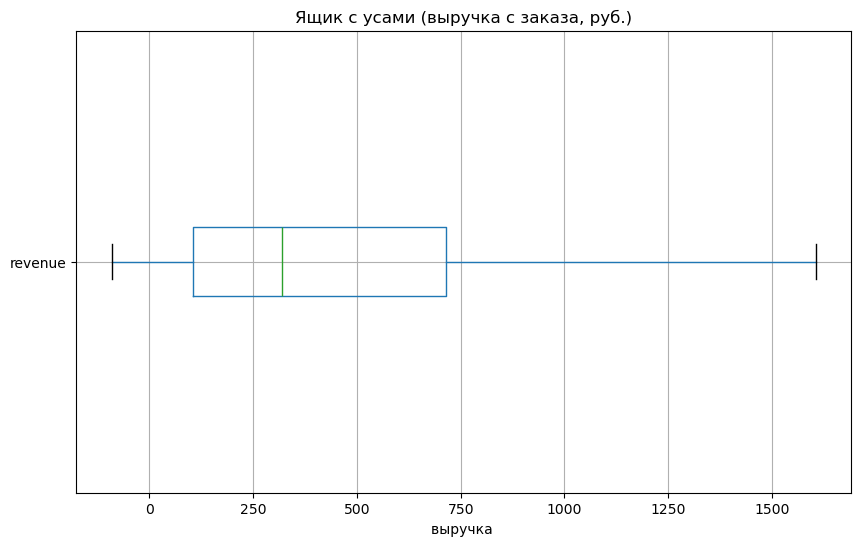

In [102]:
plt.figure(figsize = [10,6])

clean_ord_rub.boxplot(column = 'revenue',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (выручка с заказа, руб.)')
plt.xlabel('выручка ')
plt.show()

Ситуация выглядит уже лучше, нам удалось избавиться от выбросов, оставив все данные меньше 95 процентиля

Приведем тг в рубли, для этого добавим сначала длополнительный датасет с курсом

In [105]:
coef = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [107]:
coef['data']  = coef['data'].astype('datetime64[ns]') # меняем тип данных

In [108]:
clean_ord_kzt = pd.merge(clean_ord_kzt,
                         coef, 
                         how = 'left', # объединение по левому датафрейму
                         left_on = 'created_dt_msk', # выбор колонки по которой будуем объединять 
                         right_on = 'data') # выбор колонки по которой будуем объединять 


In [110]:
clean_ord_kzt['revenue_rub'] = clean_ord_kzt['revenue']/100*clean_ord_kzt['curs'] # переводим тенге в рубли
clean_ord_rub['revenue_rub'] = clean_ord_rub['revenue'] # новый столбец для присоединениея таблиц

После того как мы получили, необходимое значение в рублях избавимся от лишних колонок и объединим датафреймы обратно в один orders

In [112]:
clean_ord_kzt = clean_ord_kzt.drop(['data', 'nominal', 'curs', 'cdx'], axis = 1) # Удаляем лишние столбцы

In [114]:
orders = pd.concat([clean_ord_rub, clean_ord_kzt], ignore_index=True) # объединяем датафрейймы

рассчитаем выручку с одного мероприятия 

In [116]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276175 entries, 0 to 276174
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               276175 non-null  int64         
 1   user_id                276175 non-null  object        
 2   created_dt_msk         276175 non-null  datetime64[ns]
 3   created_ts_msk         276175 non-null  datetime64[ns]
 4   event_id               276175 non-null  int64         
 5   cinema_circuit         276175 non-null  object        
 6   age_limit              276175 non-null  int64         
 7   currency_code          276175 non-null  object        
 8   device_type_canonical  276175 non-null  object        
 9   revenue                276175 non-null  float64       
 10  service_name           276175 non-null  object        
 11  tickets_count          276175 non-null  int64         
 12  total                  276175 non-null  floa

In [117]:
orders['one_ticket_revenue_rub'] = orders['revenue_rub']/orders['tickets_count'] #рассчитываем стоимость 1 билета

выделим месяц и сезон из даты

In [119]:
orders['month'] = orders['created_dt_msk'].dt.month #создаем столбец с месяцем

In [121]:
def season(month):
    if month in (12,1,2):
        return ('Зима')
    elif month in (3,4,5):
        return ('Весна')
    elif month in (6,7,8):
        return ('Лето')
    else:
        return ('Осень')# функция возвращает название сезона в зависимости от номера месяца

In [122]:
orders['season'] = orders['month'].apply(season) #создаем новый столбец с сезоном 

In [123]:
orders[['one_ticket_revenue_rub', 'season', 'month']].head()

,one_ticket_revenue_rub,season,month
0,380.4850,Лето,8
1,144.7250,Лето,7
2,314.6425,Осень,10
3,4.2450,Лето,7
4,463.4700,Осень,10


По итогу познакомившись с данными мы:

1) избавились от выбросов, и дублей в обоих датафрейма, удалив их и прверили датасеты на пропуски

2) перевели валюту к единому виду, рублям,

3) добавили новые столбцы с указанием месяца и сезона

4) изменили тип данных для даты и времени

## 2. Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

Изучим распределение заказов по сегментам, и их сезонным изменениям.

для начала рассмотрим изменения кол-ва закзаов от месяца к месяцу

In [133]:
month_gr_orders = orders.groupby('month').agg({'order_id':'count'}).reset_index() #сгруппируем кол-во заказов по месяцам

In [135]:
def month_name(month):
    if month == 1:
        return 'Январь'
    elif month == 2:
        return 'Февраль'
    elif month == 3:
        return 'Март'
    elif month == 4:
        return 'Апрель'
    elif month == 5:
        return 'Май'
    elif month == 6:
        return 'Июнь'
    elif month == 7:
        return 'Июль'
    elif month == 8:
        return 'Август'
    elif month == 9:
        return 'Сентябрь'
    elif month == 10:
        return 'Октябрь'
    elif month == 11:
        return 'Ноябрь'
    elif month == 12:
        return 'Декабрь' # функция для определения названия месяца

In [136]:
month_gr_orders['month'] = month_gr_orders['month'].apply(month_name) # переименовываем значения в столбце в зависимсости от номера месяца

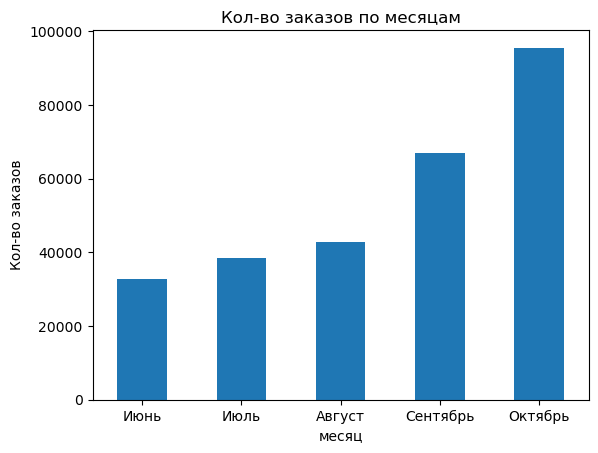

In [139]:
month_gr_orders.plot(kind = 'bar', # вид диаграмма
                     x ='month', # значения по x
                     legend=False, # убираем легенду
                     ylabel='Кол-во заказов', # название оси Y
                     xlabel='месяц',# название оси х
                     rot = 0 # поворачиваем навзание столбцов
                    )
plt.title('Кол-во заказов по месяцам')
plt.show()

Видим что, кол-во заказов стабильно растет, првоерим как они распределны по типам устройств, типу мероприятия и возрастному рейтингу

In [143]:
 device_orders_gr = orders.groupby(['season', 'device_type_canonical']).agg({'order_id':'count'}).unstack() # группируем заказы по типам устройств

In [145]:
perc_devices = device_orders_gr.reset_index()['order_id']
perc_devices['DB'] = perc_devices['desktop']+perc_devices['mobile']
perc_devices['desktop'] = round(perc_devices['desktop']/perc_devices['DB']*100,2)
perc_devices['mobile'] = round(perc_devices['mobile']/perc_devices['DB']*100,2) # расчитываем доли

In [147]:
perc_devices = perc_devices.reset_index() 

In [148]:
def seasons(season):
    if season == 0:
        return "Лето"
    else:
        return "Осень"# функция для  названия сезона

In [149]:
perc_devices['season'] = perc_devices['index'].apply(seasons)

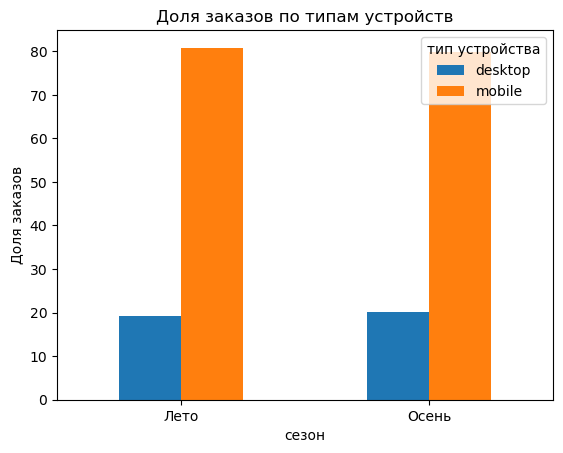

In [150]:
perc_devices.plot(kind='bar', 
                  x='season',  # столбец для x
                  y=['desktop', 'mobile'])# столбцы для у


plt.xlabel('сезон')
plt.ylabel('Доля заказов')
plt.title('Доля заказов по типам устройств')

plt.xticks(rotation=0)
plt.legend(title='тип устройства')
plt.show()

Видим, что летом как и осенью в основном билеты бронировали через телефон, примерно в одинаковых пропорциях

In [155]:
orders = orders.merge(events, on = 'event_id')

In [156]:
event_orders_gr = orders.pivot_table(values = 'order_id', index = 'event_type_main', columns = 'season', aggfunc = 'count').reset_index()

In [157]:
event_orders_gr['сумма_лето'] = event_orders_gr['Лето'].sum()
event_orders_gr['сумма_осень'] = event_orders_gr['Осень'].sum()

In [159]:
event_orders_gr['Лето'] = event_orders_gr['Лето']/event_orders_gr['сумма_лето']
event_orders_gr['Осень'] = event_orders_gr['Осень']/event_orders_gr['сумма_осень']

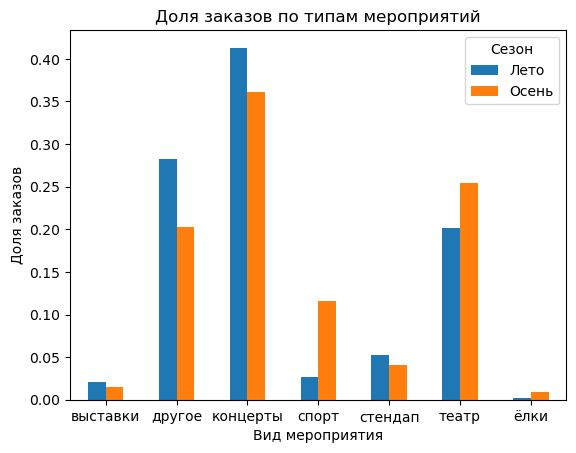

In [160]:
event_orders_gr.plot(kind='bar', 
                  x='event_type_main',  # столбец для x
                  y=['Лето', 'Осень'])# столбцы для у


plt.xlabel('Вид мероприятия')
plt.ylabel('Доля заказов')
plt.title('Доля заказов по типам мероприятий')

plt.xticks(rotation=0)
plt.legend(title='Сезон')
plt.show()

осенью значительно увеличился интерес к спорту, по сравнению с летом, концерты по прежнему остаются наиболее востребованными, при этом театры обошли раздел "другое"


In [163]:
age_orders_gr = orders.pivot_table(values = 'order_id', index = 'age_limit', columns = 'season', aggfunc = 'count').reset_index()

In [164]:
age_orders_gr['сумма_лето'] = age_orders_gr['Лето'].sum()
age_orders_gr['сумма_осень'] = age_orders_gr['Осень'].sum()

In [165]:
age_orders_gr['Лето'] = age_orders_gr['Лето']/age_orders_gr['сумма_лето']
age_orders_gr['Осень'] = age_orders_gr['Осень']/age_orders_gr['сумма_осень']

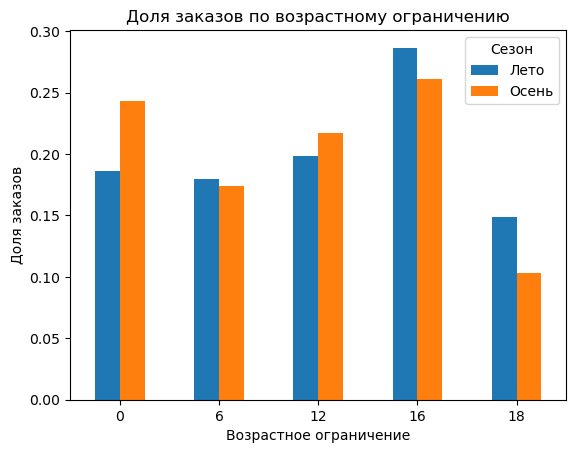

In [167]:
age_orders_gr.plot(kind='bar', 
                  x='age_limit',  # столбец для x
                  y=['Лето', 'Осень'])# столбцы для у


plt.xlabel('Возрастное ограничение')
plt.ylabel('Доля заказов')
plt.title('Доля заказов по возрастному ограничению')

plt.xticks(rotation=0)
plt.legend(title='Сезон')
plt.show()

в обоих сезонах самым частым оказалось ограничение в 16 лет, летом все остальные деражлись примерно на одном уровне, осенью же сильно вырвалось ограничение 0 лет и уппали заказы с ограничением в 18 лет

Далее рассмотрим изменение выручки с 1 билета в зависимости от типа мероприятия и сезона

In [173]:
ev_orders_gr = orders.groupby(['event_type_main', 'season']).agg({'revenue':'mean'}).unstack()

In [174]:
ev_orders_gr

revenue            
season                 Лето       Осень
event_type_main                        
выставки         223.999494  233.807637
другое           225.278950  221.899564
концерты         975.798104  646.263848
спорт            156.945148  162.780410
стендап          571.044257  631.718197
театр            525.344610  431.297548
ёлки             714.010118  623.139595

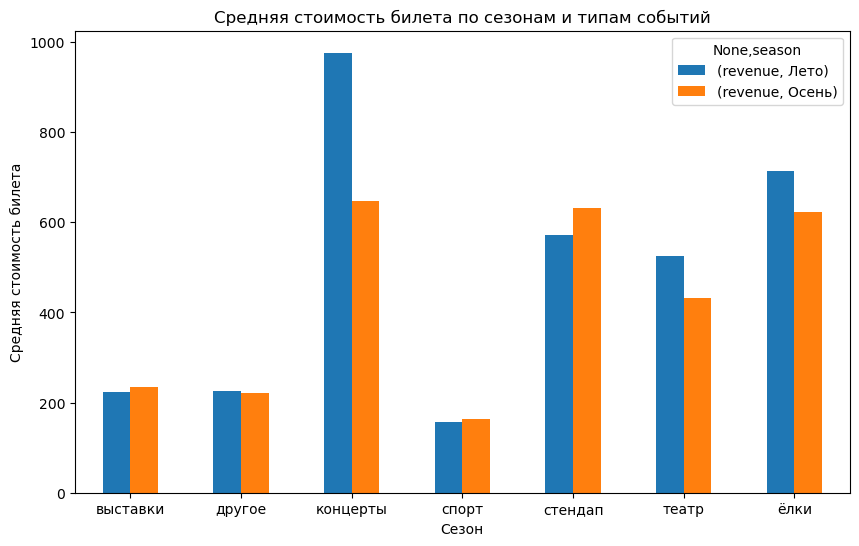

In [176]:
ev_orders_gr.plot(kind = 'bar',
               figsize = (10,6),# размер области
               title = 'Средняя стоимость билета по сезонам и типам событий',
               legend = True,
               ylabel = 'Средняя стоимость билета',
               xlabel = 'Сезон',
               rot = 0)

plt.show()

In [177]:
ev_orders_gr = ev_orders_gr.reset_index()['revenue']

In [178]:
ev_orders_gr = ev_orders_gr.reset_index()

In [179]:
def typ_ev(event):
    if event == 0:
        return "Выставки"
    elif event == 1:
        return "Другое"
    elif event == 2:
        return "Концерты"
    elif event == 3:
        return "Спорт"
    elif event == 4:
        return "Стендап"
    elif event == 5:
        return "Театр"
    else:
        return "Ёлки" # ффункция для опредлеения навзания мероприятия

In [180]:
ev_orders_gr['event_type'] = ev_orders_gr['index'].apply(typ_ev) # определяем название события

In [181]:
ev_orders_gr['dif'] = round(100/ev_orders_gr['Лето']*ev_orders_gr['Осень']-100,2) # высчитываем изменение

In [182]:
ev_orders_gr

season,index,Лето,Осень,event_type,dif
0,0,223.999494,233.807637,Выставки,4.38
1,1,225.278950,221.899564,Другое,-1.50
2,2,975.798104,646.263848,Концерты,-33.77
3,3,156.945148,162.780410,Спорт,3.72
4,4,571.044257,631.718197,Стендап,10.63
5,5,525.344610,431.297548,Театр,-17.90
6,6,714.010118,623.139595,Ёлки,-12.73


масштабнее всего изменилоись цены на концерты, театр и Ёлки, при этом стоимость билетов на концерт снизилась на 33,77 %, на театр на 17,9 %, на Ёлки на 12,73 %, а на стендап наоборот поднялись на 10,63%

По итоам, предпочтения в типе устройств у потребителей не поменялось, доли за лето и осень примерно одлинаквые, изменения произошли в типе мероприятий, пользователи больше стали проявлять интерес к спорту и театрам. По возрастным ограничениям по прежнему лидирует ограничение в 16 лет, при этом увеличился интерес к ограничеям в 0 лет и уменьшился интерес к фильмам с высоким возрастным ограничением в 18 лет

### Осенняя активность пользователей


Проанализируем динамику изменений в осени, для этого выделим отдельно датафрейм с данными по осени

In [190]:
orders_autumn = orders[(orders['month'] == 9)|(orders['month'] == 10) ] # оставляем только осень

In [191]:
pivot_orders = orders_autumn.groupby('created_dt_msk').agg({'order_id':'count','user_id':'unique'}).reset_index()# группируем данные по дням

In [193]:
pivot_orders['user_id'] = pivot_orders['user_id'].apply(len) # определяем кол-во уникальных пользователей
pivot_orders['day_of_week'] = pivot_orders['created_dt_msk'].dt.day_name() # определяем день недели
pivot_orders['orders_on_user'] = pivot_orders['order_id']/pivot_orders['user_id'] # определяем кол-во заказов на 1 пользователя

In [194]:
x_p = pivot_orders['created_dt_msk'] # определяем знчение оп x
y_orders = pivot_orders['order_id']# определяем значнеие по y для 1 графика с заказами 
y_users = pivot_orders['user_id']#определяем значнеие по y для 2 графика с пользователями 

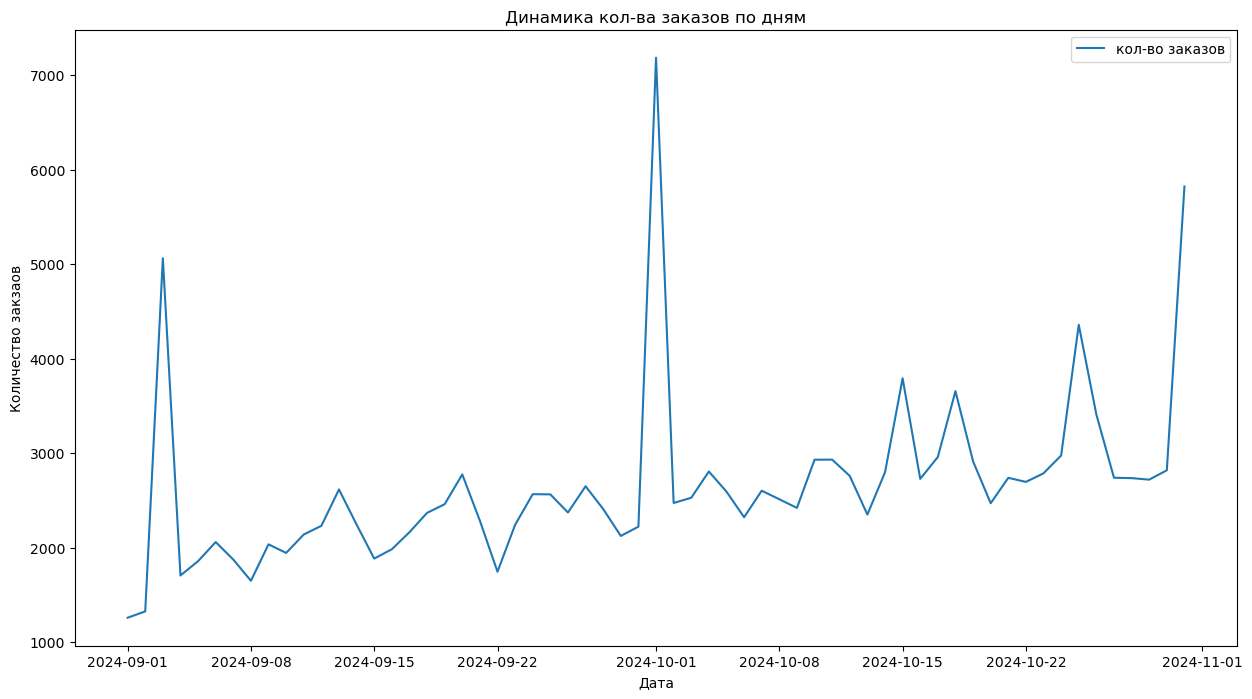

In [195]:
plt.figure(figsize=(15, 8))
plt.plot(x_p, y_orders, label ='кол-во заказов')


plt.xlabel("Дата")
plt.ylabel("Количество закзаов")
plt.legend()
plt.title('Динамика кол-ва заказов по дням')
plt.show()

по графику видим, что в начале каждого месяца идет всплеск кол-ва заказов, после чего значение нормализуется и держится примерно между 1500 и 3000, при этом можно заметить небольшой рост 

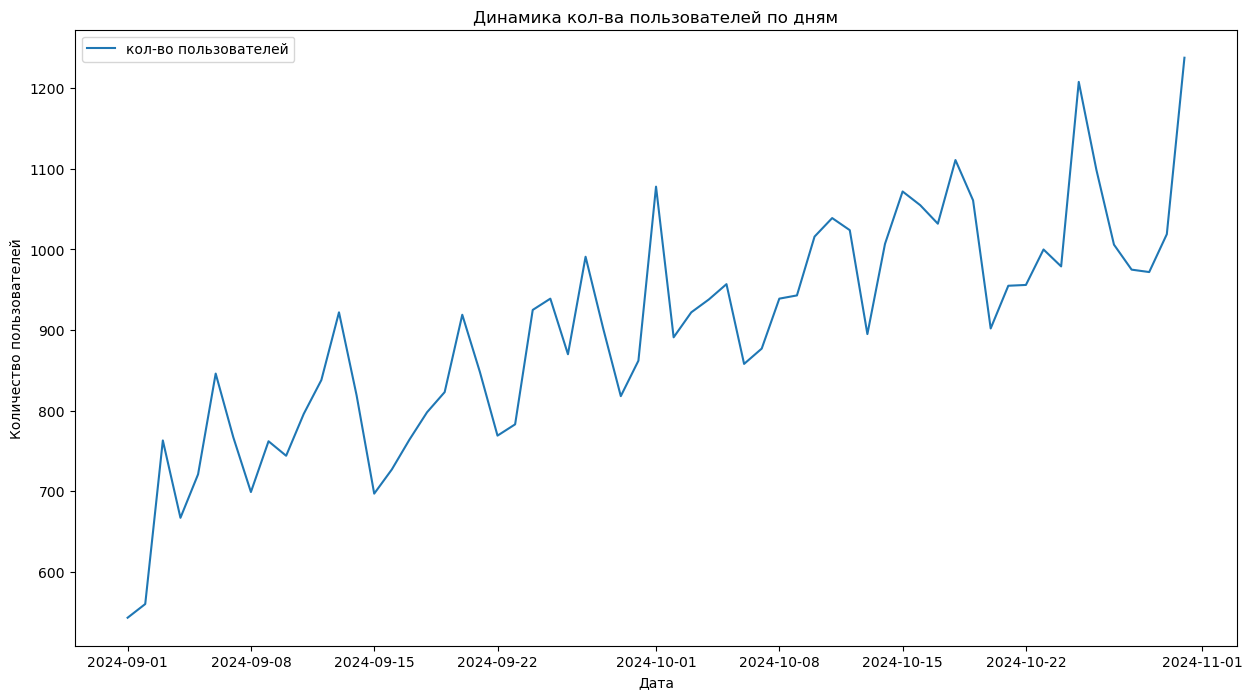

In [198]:
plt.figure(figsize=(15, 8))
plt.plot(x_p, y_users, label ='кол-во пользователей')


plt.xlabel("Дата")
plt.ylabel("Количество пользователей")
plt.legend()
plt.title('Динамика кол-ва пользователей по дням')
plt.show()

In [199]:
pivot_orders_2 = orders_autumn.groupby('created_dt_msk').agg({'order_id':'count','user_id':'unique', 'revenue':'sum','tickets_count':'sum' }).reset_index()

In [201]:
pivot_orders_2['user_id'] = pivot_orders_2['user_id'].apply(len)
pivot_orders_2['ord_on_user'] =pivot_orders_2['order_id']/pivot_orders_2['user_id']
pivot_orders_2['avg_ticket'] =pivot_orders_2['revenue']/pivot_orders_2['tickets_count']

In [204]:
y_ord_on_user = pivot_orders_2['ord_on_user']
y_tickets = pivot_orders_2['avg_ticket']

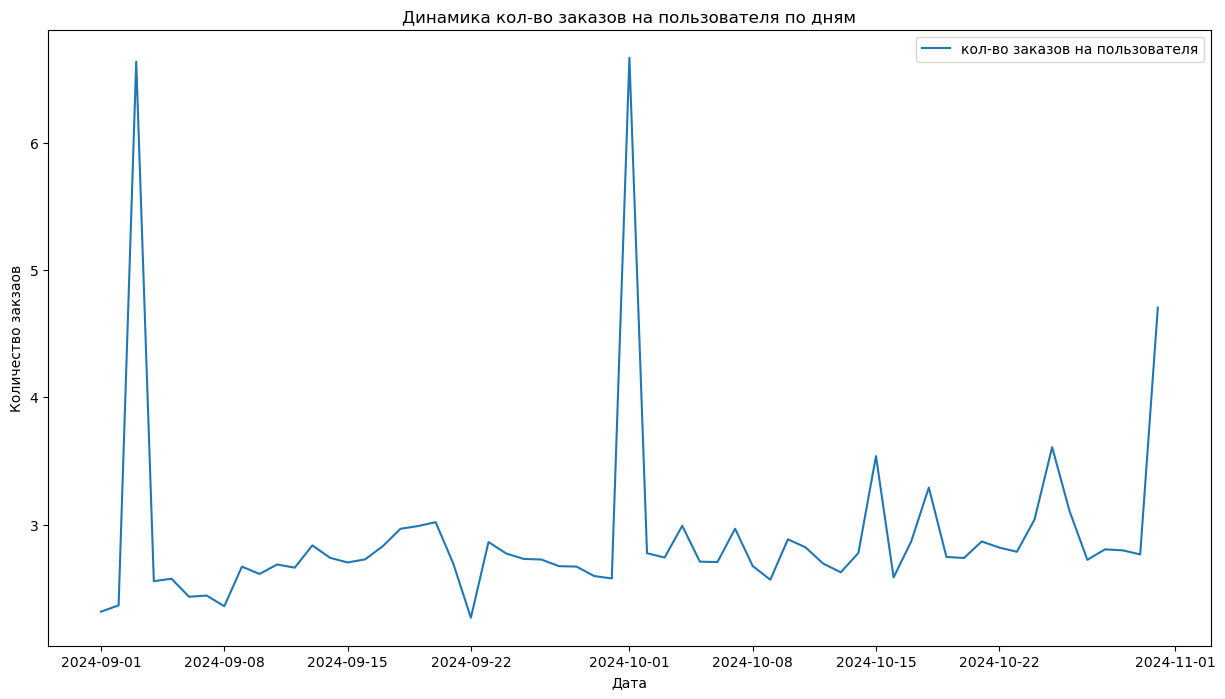

In [205]:
plt.figure(figsize=(15, 8))
plt.plot(x_p, y_ord_on_user, label ='кол-во заказов на пользователя')


plt.xlabel("Дата")
plt.ylabel("Количество закзаов")
plt.legend()
plt.title('Динамика кол-во заказов на пользователя по дням')
plt.show()

Видим, что в среднем кол-во заказов на пользователя колеблятся от 1,5 до 3, как и с кол-вом заказов в целом, присутсвуют выбросы в начале каждого месяца

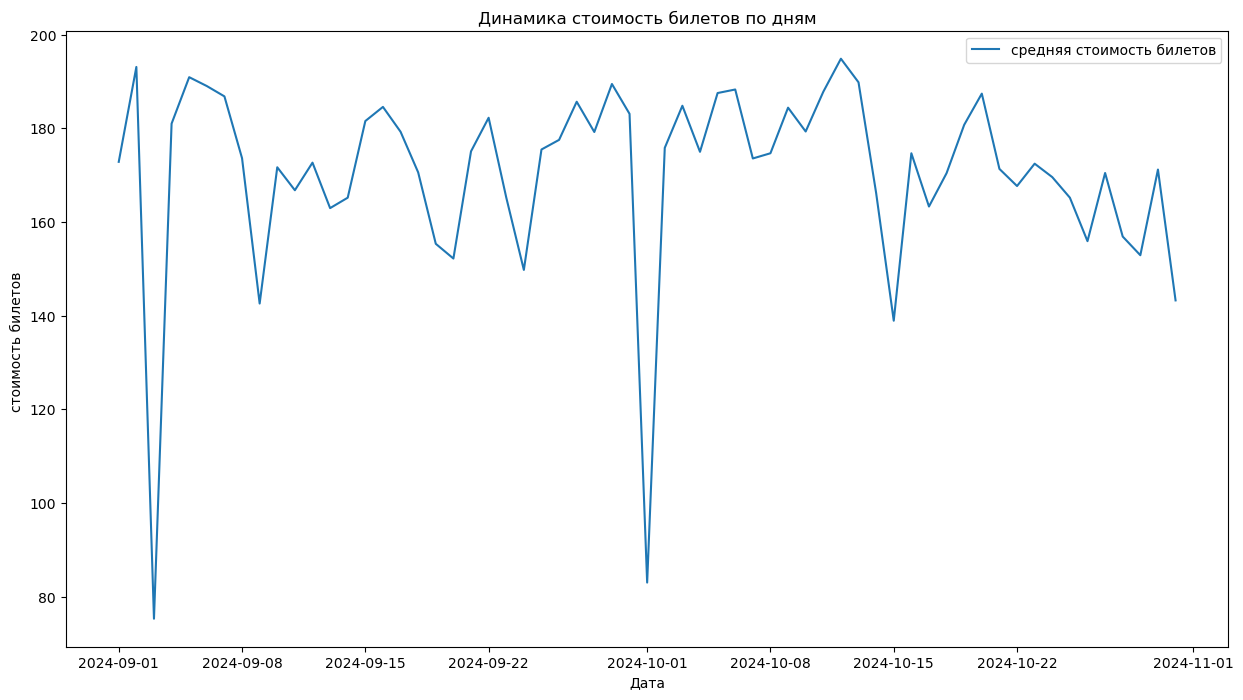

In [207]:
plt.figure(figsize=(15, 8))
plt.plot(x_p, y_tickets, label ='средняя стоимость билетов')


plt.xlabel("Дата")
plt.ylabel("стоимость билетов ")
plt.legend()
plt.title('Динамика стоимость билетов по дням')
plt.show()

График со средней стоимостью объясняет неожиданные выбросы в кол-ве заказов, в начале кажддого месяца, цены на юилеты рзк падали, что приводила к увеличению спроса,при этом в остальное вермя, все держится примерно на уровне от 140 до 190

график с кол-вом пользщователей показывает большую стабильность, замечен рост от месяца к месяцу

In [211]:
pivot_orders_by_days = pivot_orders.groupby('day_of_week').agg({'orders_on_user':'mean'})

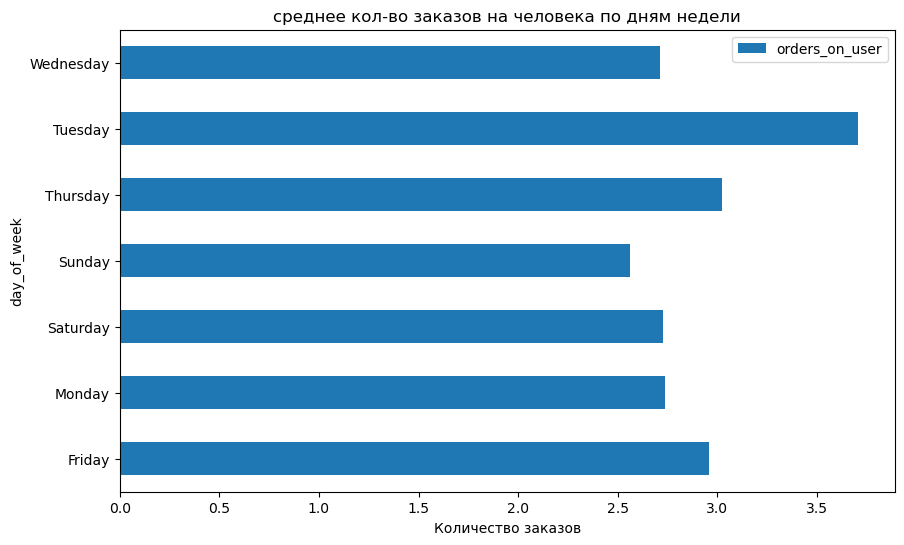

In [212]:
pivot_orders_by_days.plot(kind = 'barh',
               figsize = (10,6),# размер области
               title = 'среднее кол-во заказов на человека по дням недели',
               legend = True,
               xlabel = 'День недели',
               rot = 0)
plt.xlabel("Количество заказов")
plt.show()


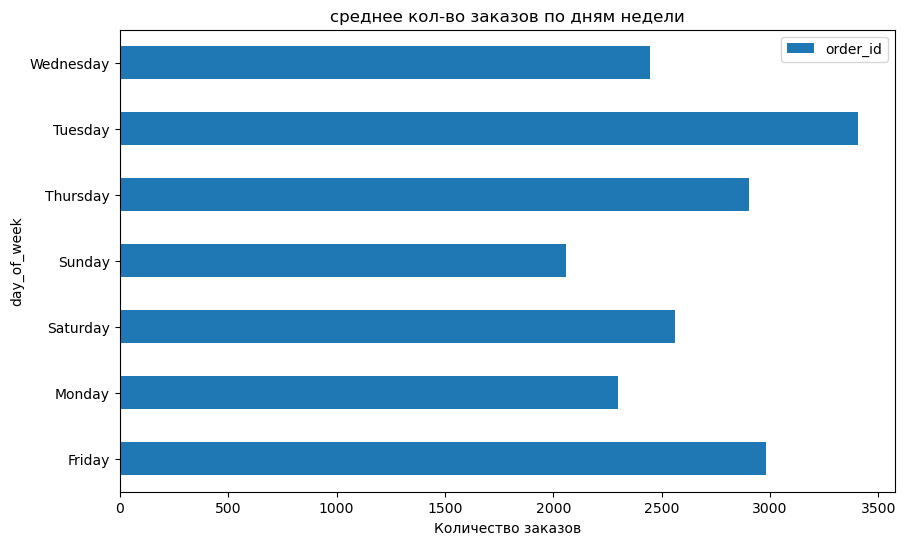

In [213]:
pivot_orders_gr = pivot_orders.groupby('day_of_week').agg({'order_id':'mean'})

pivot_orders_gr.plot(kind = 'barh',
               figsize = (10,6),# размер области
               title = 'среднее кол-во заказов по дням недели',
               legend = True,
               xlabel = 'День недели',
               rot = 0)
plt.xlabel("Количество заказов")
plt.show()


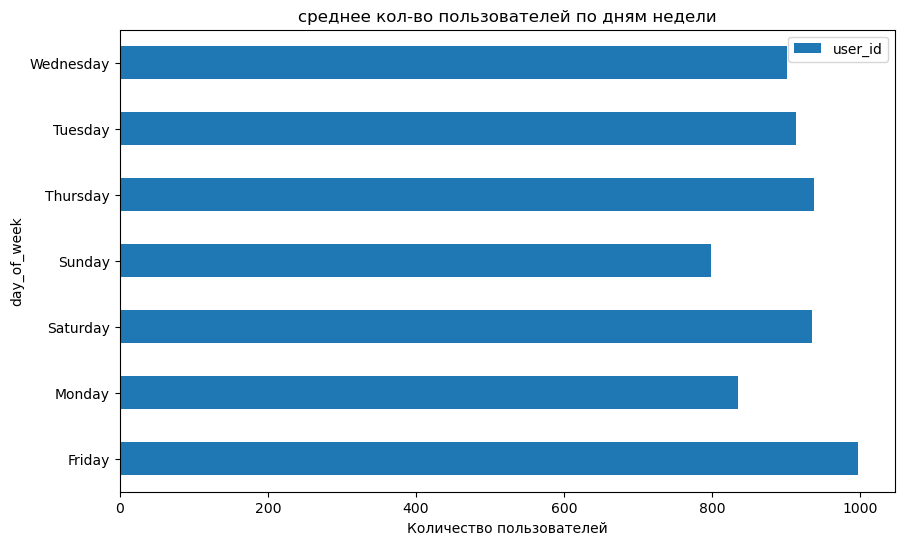

In [214]:
pivot_users_gr = pivot_orders.groupby('day_of_week').agg({'user_id':'mean'})

pivot_users_gr.plot(kind = 'barh',
               figsize = (10,6),# размер области
               title = 'среднее кол-во пользователей по дням недели',
               legend = True,
               xlabel = 'День недели',
               rot = 0)
plt.xlabel("Количество пользователей")
plt.show()

По итогу можно заметить что самый пик нагрузки приходится на вторник и пятницу, в эти дни как правило больше всего заказов. Если сравнивать будни с выходными, то видно что в восркесенье меньше всего заказов, как и пользователей, однако суббота не сильно отстает от остальных дней недели, и даже обходит по кол-ву заказов среду и понедельник. Что касается динамики в целом, то кол-во пользователей осенью стабильно растет, как и кол-во заказов, но заказы в меньшей мере

### Популярные события и партнёры

In [219]:
pivot_orders_region = orders_autumn.groupby(['region_name']).agg({'order_id':'count','event_id':'unique'}).reset_index()

In [220]:
pivot_orders_region['event_id'] = pivot_orders_region['event_id'].apply(len)

In [221]:
pivot_orders_region['perc'] = round(pivot_orders_region['order_id']/pivot_orders_region['order_id'].sum(),2)
pivot_orders_region['perc_ev'] = round(pivot_orders_region['event_id']/pivot_orders_region['order_id'],2)

In [222]:
pivot_orders_region.sort_values('order_id', ascending=False)

,region_name,order_id,event_id,perc,perc_ev
23,Каменевский регион,44110,3808,0.27,0.09
59,Североярская область,20033,2590,0.12,0.13
41,Медовская область,11990,368,0.07,0.03
75,Широковская область,8396,802,0.05,0.10
44,Озернинский край,6809,296,0.04,0.04
...,...,...,...,...,...
78,Яснопольский округ,18,5,0.00,0.28
47,Островогорский округ,15,4,0.00,0.27
32,Крутоводский регион,14,5,0.00,0.36
5,Верхозёрский край,11,2,0.00,0.18


Больше всего заказов осенью было в Каменевском районе 44110, что сосотавляет 27 % от всех заказов, дальше идет, североярская область 20033 12%, медовская область 11990, 7%. При этом прцент уникальных событий не так высок 9% у первого места, 19% у второго, 3 % у третьего 10 % у четвертого и 4 % у пятого


меньше всего закзов приходится на сосноводлинскую облатсь, за 2 месяца всего 9 закзаов  Верхозерский край 11 заказов и Крутоводский регион 14 заказов. Процент уникальных собтий в этих регионах больше от 11% дло 36% у последних 5 



In [229]:
pivot_orders_service = orders_autumn.groupby(['service_name']).agg({'order_id':'count','event_id':'unique', 'revenue':'sum'}).reset_index()

In [232]:
pivot_orders_service['event_id'] = pivot_orders_service['event_id'].apply(len)

In [233]:
pivot_orders_service['orders_perc'] = round(pivot_orders_service['order_id']/pivot_orders_service['order_id'].sum(),2)
pivot_orders_service['revenue_perc'] = round(pivot_orders_service['revenue']/pivot_orders_service['revenue'].sum(),2)
pivot_orders_service['event_perc'] = round(pivot_orders_service['event_id']/pivot_orders_service['order_id'],2)

In [234]:
display(pivot_orders_service.sort_values('order_id', ascending=False).head(5))
pivot_orders_service.sort_values('order_id', ascending=True).head(5)

,service_name,order_id,event_id,revenue,orders_perc,revenue_perc,event_perc
3,Билеты без проблем,31370,2836,11561015.03,0.19,0.16,0.09
5,Билеты в руки,25403,2453,6982503.56,0.16,0.10,0.10
21,Лови билет!,25192,3591,9203481.99,0.16,0.13,0.14
24,Мой билет,18601,994,9955350.73,0.11,0.14,0.05
25,Облачко,14834,1372,9355894.70,0.09,0.13,0.09


,service_name,order_id,event_id,revenue,orders_perc,revenue_perc,event_perc
20,Лимоны,1,1,119.93,0.0,0.0,1.00
16,Зе Бест!,2,1,30.01,0.0,0.0,0.50
4,Билеты в интернете,4,1,548.23,0.0,0.0,0.25
32,Тех билет,5,2,1722.63,0.0,0.0,0.40
7,Быстрый кассир,7,1,6089.25,0.0,0.0,0.14


Итого получаем, что самые лучшие билтеные партнеры по кол-ву заказов:
1) "билеты без проблем" - 31370 закзаов и 11 561 015 руб.

2) "Билеты в руки" - 25403 заказа и 6 982 503 руб.

3) "Лови билет" - 25192 заказа и 9 203 481 руб.

4) "Мой билет" - 18601 заказ и 9 955 350 руб.

5) "Облачко" - 14834 заказа и 9 355 894 руб.

При этом стоит отметить , несмотря на то что Билеты в руки и лови билет приняли больше закзаов их суммарная выручка меньше чем у сервиса Мой билет и облачко,а что касается уникальных событий, то их процент так же не велик и колеблется от 5 до 14% у первых 5

Подытожив если смотреть регионы, то более половины заказов приходится на 5 регионов (Каменевский регион, Североярская область, Медовская область, Широковская область,  Озернинский край), а именно  55 %.

Что касается билетных партнеров ситуация схожа, на топ 5 партнеров приходится 71 % всех заказов и 66% выручки

## Статистический анализ данных

Проверим первую гипотезу о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

Нулевая гипотеза - различий между устройствами в кол-ве заказов нет

Альтернитваня гипотеза - Кол-во заказов на польззователя у мобильных устройств больше

Проверим независимость переменных, попадают ли пользователи в обе группы 

In [242]:
mobile = orders_autumn[orders_autumn['device_type_canonical'] == 'mobile']['user_id']
desktop = orders_autumn[orders_autumn['device_type_canonical'] == 'desktop']['user_id']

intersection = list(set(mobile) & set(desktop))
print(len(intersection))
print(len(orders['user_id'].unique()))

3153
21443


Хоть и кол-во пользователей которые пользуются обоими устрйоствами велико, для корректного анализа нужно бьудет от них избавиться

In [247]:
cl_orders = orders_autumn[orders_autumn['user_id'].isin(intersection)]

In [248]:
orders_by_day = cl_orders.groupby(['created_dt_msk','device_type_canonical']).agg({'order_id':'count', 'user_id':'unique'}).reset_index()

In [249]:
orders_by_day['user_id'] = orders_by_day['user_id'].apply(len)

In [250]:
orders_by_day['orders_on_user'] = orders_by_day['order_id']/orders_by_day['user_id']

проверим значения среднего заказа на человека на выбросы

Text(0.5, 0, 'кол-во заказов ')

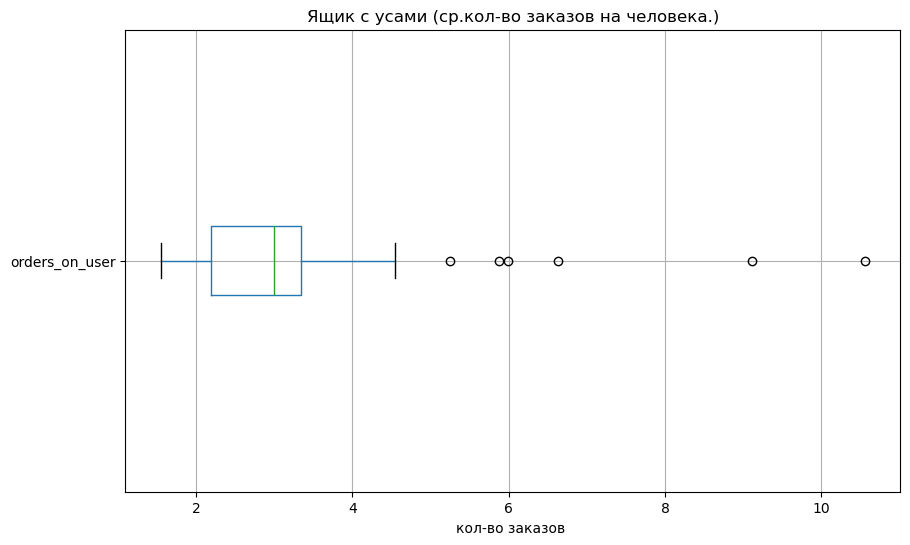

In [253]:
plt.figure(figsize = [10,6])

orders_by_day.boxplot(column = 'orders_on_user',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (ср.кол-во заказов на человека.)')
plt.xlabel('кол-во заказов ')

Избавимся от них

In [255]:
orders_by_day= orders_by_day.drop(orders_by_day[orders_by_day['orders_on_user']>= orders_by_day['orders_on_user'].quantile(0.965)].index)

Text(0.5, 0, 'кол-во заказов ')

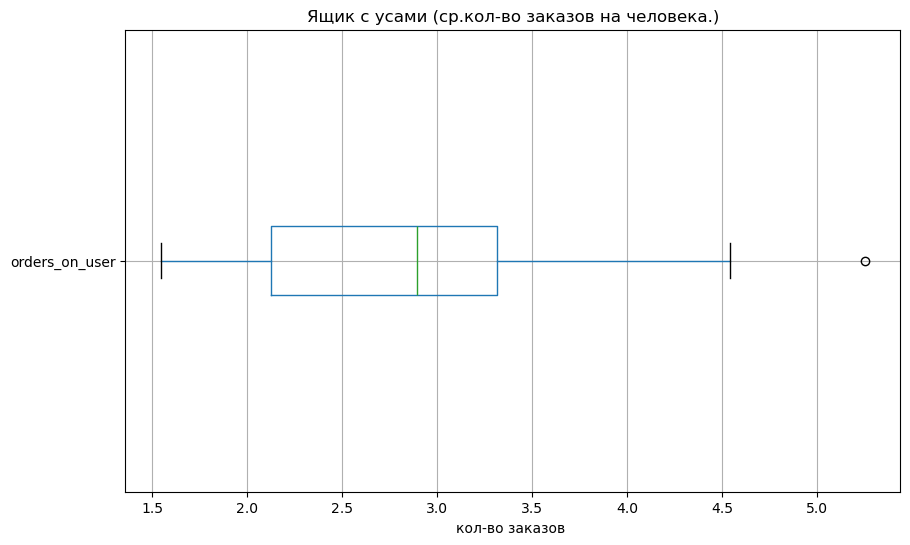

In [256]:
plt.figure(figsize = [10,6])

orders_by_day.boxplot(column = 'orders_on_user',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (ср.кол-во заказов на человека.)')
plt.xlabel('кол-во заказов ')

теперь мы избавились от выбросов, данные независимые и их достаточно много, соответсвенно согласно центральной предельной теореме их средние будут распредены нормально и мы можем использщовать t-тест Уэлча. Уровень значимость оставим как 0.05



In [258]:
orders_by_day

,created_dt_msk,device_type_canonical,order_id,user_id,orders_on_user
0,2024-09-01,desktop,158,83,1.903614
1,2024-09-01,mobile,818,314,2.605096
2,2024-09-02,desktop,232,120,1.933333
3,2024-09-02,mobile,807,303,2.663366
6,2024-09-04,desktop,300,150,2.000000
...,...,...,...,...,...
116,2024-10-29,desktop,515,208,2.475962
117,2024-10-29,mobile,1569,483,3.248447
118,2024-10-30,desktop,484,228,2.122807
119,2024-10-30,mobile,1678,489,3.431493


In [259]:
mobile_users = orders_by_day[orders_by_day['device_type_canonical'] == 'mobile']['orders_on_user']
desktop_users = orders_by_day[orders_by_day['device_type_canonical'] == 'desktop']['orders_on_user']
alpha = 0.05

In [261]:
from scipy.stats import ttest_ind

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    desktop_users, 
    mobile_users, 
    equal_var=False,
    alternative='less'
) ## применяем t-тест Уэлча
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча ={p_value_welch_ttest}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние между типами устройств равны')
else:
    print(f'p-value теста Уэлча ={p_value_welch_ttest}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние не равны, кол-во заказов на польззователя у мобильных устройств больше ')

p-value теста Уэлча =1.8831570664319345e-30
Нулевая гипотеза не находит подтверждения! Выборочные средние не равны, кол-во заказов на польззователя у мобильных устройств больше 


По итогу, согласно t-тесту Уэлча мы принимает Альтернативную гипотезу, о том, что кол-во заказов на польззователя у мобильных устройств больше

Далее рассмотрим следующую гипотезу, о том, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


In [265]:
days_since_orders = orders_autumn.groupby(['user_id','device_type_canonical']).agg({'days_since_prev':'mean'}).reset_index()

Проверим данные на выбросы

Text(0.5, 0, 'дни ')

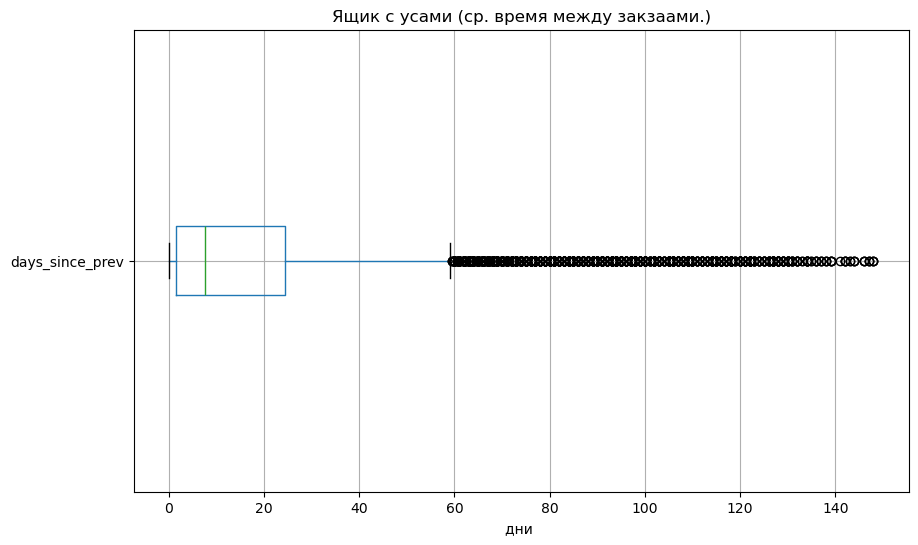

In [267]:
plt.figure(figsize = [10,6])

days_since_orders.boxplot(column = 'days_since_prev',
                       showfliers = True,
                       vert = False)
plt.title('Ящик с усами (ср. время между закзаами.)')
plt.xlabel('дни ')

Получаем очень много выбросов, так как удалив их мы потеряем значительную часть данных, используем тест Манна Уитни, уровень значимости оставим 0,05

In [270]:
days_since_orders = days_since_orders.dropna(subset=['days_since_prev'])

In [271]:
mobile_days = days_since_orders[days_since_orders['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_days = days_since_orders[days_since_orders['device_type_canonical'] == 'desktop']['days_since_prev']

теперь мы спокойно можем проводить тест. 

Нулевая гипотеза будет о том, что среднее время между заказами пользователей разных устйоств не различается, 

Альтернативаня - что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

In [274]:
from scipy.stats import mannwhitneyu

mw_test = mannwhitneyu(
    desktop_days,
    mobile_days,
    alternative='less'
)

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения дней между заказами по типам устройств равны')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Среднее время между заказами пользователей мобильных приложений выше')

pvalue=5.938267842634173e-52 < 0.05
Нулевая гипотеза не находит подтверждения! Среднее время между заказами пользователей мобильных приложений выше


Получаем, что время между заказами мобильных устройств в среднем выше по сравнение с стационарными устройствами

## Общий вывод и рекомендации

По итогу выполнения проекта:

1) обработаны данные для дальнейшей работы с ними, были удалены дубли и выбросы, изменены типы для даты и времени, а так же курс валют приведен к единому формату (руб.)

2) Проведен исследовательский анализ данных, просмотрели как менялось поведение пользоавтелей по сезонам, обнаружили, что пользователи больше стали проявлять интерес к спорту и театрам осенью по сравнению с летом. По возрастным ограничениям по прежнему лидирует ограничение в 16 лет, при этом увеличился интерес к ограничеям в 0 лет и уменьшился интерес к фильмам с высоким возрастным ограничением в 18 лет, А так же в оба сезона польователи предпочитали мобильные устрйоства

3) проанализированы регионы и билетные партнеры, определили, что если смотреть регионы, то более половины заказов приходится на 5 регионов (Каменевский регион, Североярская область, Медовская область, Широковская область, Озернинский край), а именно 55 %. Что касается билетных партнеров ситуация схожа, на топ 5 партнеров приходится 71 % всех заказов и 66% выручки

4) проверили и подтвердили 2 гипотезы, о том, что время между заказами мобильных устройств в среднем выше по сравнение с стационарными устройствами и  что в среднем кол-во заказов на пользователя у мобильных устройств больше

Исходя из анализа, стоит более подробно рассмотреть заказы стационарных устрйоств, чтобы понять почему в среднем закзывают меньше, может  пользователей отталкивает интерфейс либо были какие то иные проблемы.
Стоит рассмотреть какие события произошли осенью, чтобы понять почему люди стали больше инетресоваться спортом, вероятно проводился какой то чемпионат, это позволит понять и предсказать примрное поведение пользоватейе в другие сезоны